<b><font size="6" color="red">ch12. 데이터프레임과 시리즈(Pandas)_8절</font></b>
- https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

# 8절. 데이터 그룹화 및 집계

In [1]:
import pandas as pd
import numpy as np
from statsmodels.api import datasets
iris_df = datasets.get_rdataset('iris').data
iris_df.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


## 8.1 Groupby

In [5]:
iris_grouped = iris_df.groupby(iris_df.Species)
for iris in iris_grouped:
    print(iris)

In [4]:
iris_grouped_sum = iris_grouped.sum()
iris_grouped_sum
                # 5.1 ... 을 모두 더함 / 3.5 ...을 모두 더함 / ... ...

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [5]:
iris_grouped_sum.reset_index()
# 그룹별 합의 기준인 Species를 컬럼데이터로 편입

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [8]:
print(iris_df.groupby('Species').sum())
print(iris_df.groupby(['Species']).mean())
print(iris_df.groupby(iris_df.Species).median())
                # 앞에서는 df.sum(axis=1)와 같이 groupby 없이도 mean()등을 사용함

            Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                         
setosa             250.3        171.4          73.1         12.3
versicolor         296.8        138.5         213.0         66.3
virginica          329.4        148.7         277.6        101.3
            Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026
            Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0


In [9]:
# 종별 Sepal.Length의 합계(하나만 원할 경우 vs 위에는 4개 컬럼 모두 원하는 경우)
# iris_df.groupby(['인덱스로 사용할 컬럼명'])['원하는 컬럼명'].연산()
iris_df.groupby(['Species'])['Sepal.Length'].sum() # 결과가 시리즈

Species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: Sepal.Length, dtype: float64

In [10]:
iris_df.groupby(['Species'])['Sepal.Length','Sepal.Width'].sum()

<ipython-input-10-c5e95ef049a2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  iris_df.groupby(['Species'])['Sepal.Length','Sepal.Width'].sum()


,Sepal.Length,Sepal.Width
Species,,
setosa,250.3,171.4
versicolor,296.8,138.5
virginica,329.4,148.7


In [11]:
iris_df.pivot_table(index='Species', values = ['Sepal.Length'], aggfunc='sum') # 결과가 데이터프레임

,Sepal.Length
Species,
setosa,250.3
versicolor,296.8
virginica,329.4


In [ ]:
# 한 열에 대해서 값을 구할 때는 series로 구하게 코드를 구성해도 괜찮음.

In [12]:
iris_df.groupby(['Species']).count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [13]:
iris_df.loc[1, 'Sepal.Length'] = np.nan # 데이터 하나에 결측치를 입력
iris_df.groupby(['Species']).count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,49,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [14]:
iris_df.loc[1, 'Sepal.Length'] = 4.9
iris_df.groupby('Species')['Sepal.Length'].count()

Species
setosa        50
versicolor    50
virginica     50
Name: Sepal.Length, dtype: int64

In [15]:
iris_df['Species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

In [ ]:
# 부동산의 경우 다중 group화가 필요.
# 지역별, 연도별 부동산 가격의 변동

### 다중열로 그룹화

In [8]:
r = iris_df.groupby(['Species','Sepal.Length']).sum()
r.loc['setosa'].head()

,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,,,
4.3,3.0,1.1,0.1
4.4,9.1,4.0,0.6
4.5,2.3,1.3,0.3
4.6,13.3,5.3,0.9
4.7,6.4,2.9,0.4


In [20]:
iris_df.groupby(['Species']).describe().T

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [23]:
g = iris_df.groupby('Species').mean()
g 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


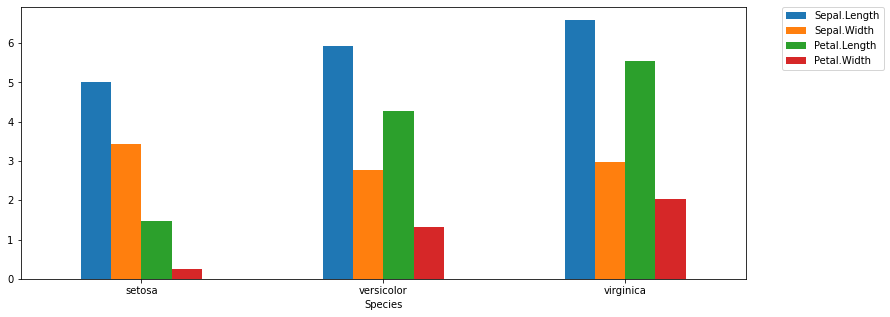

In [29]:
import matplotlib.pyplot as plt
g.plot(kind='bar', rot=0, figsize=(13,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
         # loc legend의 위치('best','upper right','upper left','lower left', ...)     

In [ ]:
# 다큐먼트 사이트들을 적극 참조!!

In [31]:
# Species, Petal.Width별 mean()
g = iris_df.groupby(['Species', 'Petal.Width']).mean()
g

Sepal.Length  Sepal.Width  Petal.Length
Species    Petal.Width                                         
setosa     0.1              4.820000     3.360000      1.380000
           0.2              4.972414     3.379310      1.444828
           0.3              4.971429     3.328571      1.428571
           0.4              5.300000     3.785714      1.571429
           0.5              5.100000     3.300000      1.700000
           0.6              5.000000     3.500000      1.600000
versicolor 1.0              5.414286     2.371429      3.628571
           1.1              5.400000     2.466667      3.566667
           1.2              5.780000     2.740000      4.240000
           1.3              5.884615     2.746154      4.176923
           1.4              6.357143     2.957143      4.500000
           1.5              6.190000     2.880000      4.580000
           1.6              6.100000     3.133333      4.766667
           1.7              6.700000     3.000000      5.000000
           1.8              5.900000     3.200000      4.800000
virginica  1.4              6.100000     2.600000      5.600000
           1.5              6.150000     2.500000      5.050000
           1.6              7.200000     3.000000      5.800000
           1.7              4.900000     2.500000      4.500000
           1.8              6.445455     2.918182      5.381818
           1.9              6.340000     2.680000      5.320000
           2.0              6.650000     3.016667      5.550000
           2.1              6.916667     3.033333      5.783333
           2.2              6.866667     3.200000      6.033333
           2.3              6.912500     3.087500      5.700000
           2.4              6.266667     3.100000      5.433333
           2.5              6.733333     3.400000      5.933333

In [32]:
# 앞에 있는 인덱스만 그대로 두고 끝의 인덱스를 column값으로 변환
g.unstack()

Sepal.Length                                                    \
Petal.Width          0.1       0.2       0.3  0.4  0.5  0.6       1.0  1.1   
Species                                                                      
setosa              4.82  4.972414  4.971429  5.3  5.1  5.0       NaN  NaN   
versicolor           NaN       NaN       NaN  NaN  NaN  NaN  5.414286  5.4   
virginica            NaN       NaN       NaN  NaN  NaN  NaN       NaN  NaN   

                             ... Petal.Length                             \
Petal.Width   1.2       1.3  ...          1.6  1.7       1.8   1.9   2.0   
Species                      ...                                           
setosa        NaN       NaN  ...          NaN  NaN       NaN   NaN   NaN   
versicolor   5.78  5.884615  ...     4.766667  5.0  4.800000   NaN   NaN   
virginica     NaN       NaN  ...     5.800000  4.5  5.381818  5.32  5.55   

                                                          
Petal.Width       2.1       2.2  2.3       2.4       2.5  
Species                                                   
setosa            NaN       NaN  NaN       NaN       NaN  
versicolor        NaN       NaN  NaN       NaN       NaN  
virginica    5.783333  6.033333  5.7  5.433333  5.933333  

[3 rows x 66 columns]

<AxesSubplot:>

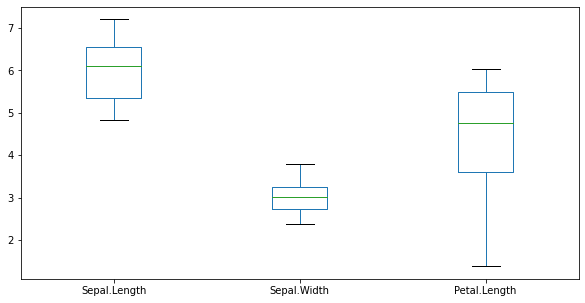

In [34]:
g.plot(kind = 'box', figsize=(10,5))

In [14]:
# Species, Petal.Width별 Sepal.Length의 평균
g = iris_df.groupby(['Species', 'Petal.Width'])['Sepal.Length'].mean()
g

Species     Petal.Width
setosa      0.1            4.820000
            0.2            4.972414
            0.3            4.971429
            0.4            5.300000
            0.5            5.100000
            0.6            5.000000
versicolor  1.0            5.414286
            1.1            5.400000
            1.2            5.780000
            1.3            5.884615
            1.4            6.357143
            1.5            6.190000
            1.6            6.100000
            1.7            6.700000
            1.8            5.900000
virginica   1.4            6.100000
            1.5            6.150000
            1.6            7.200000
            1.7            4.900000
            1.8            6.445455
            1.9            6.340000
            2.0            6.650000
            2.1            6.916667
            2.2            6.866667
            2.3            6.912500
            2.4            6.266667
            2.5            6.733333
Name

In [38]:
g.unstack()

Petal.Width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,...,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
Species,,,,,,,,,,,,,,,,,,,,,
setosa,4.82,4.972414,4.971429,5.3,5.1,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,5.414286,5.4,5.78,5.884615,...,6.1,6.7,5.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.2,4.9,6.445455,6.34,6.65,6.916667,6.866667,6.9125,6.266667,6.733333


In [ ]:
pd.option.display.max_columns = 숫자 를 설정함으로써 최대 표현되는 열의 수를 조정할 수 있음.

## 8.2 그룹간 데이터 처리

In [20]:
iris_group = iris_df.groupby('Species')
iris_group 

In [21]:
for idx, (speciesname, group) in enumerate(iris_group):
    print(idx, '번째 그룹은', speciesname)
    print(group.sample(5).sort_index())
    print('■■■■■■■■■■■■■■■■■■■■■■■■■■')

0 번째 그룹은 setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
22           4.6          3.6           1.0          0.2  setosa
23           5.1          3.3           1.7          0.5  setosa
29           4.7          3.2           1.6          0.2  setosa
35           5.0          3.2           1.2          0.2  setosa
42           4.4          3.2           1.3          0.2  setosa
■■■■■■■■■■■■■■■■■■■■■■■■■■
1 번째 그룹은 versicolor
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
71           6.1          2.8           4.0          1.3  versicolor
83           6.0          2.7           5.1          1.6  versicolor
85           6.0          3.4           4.5          1.6  versicolor
■■■■■■■■■■■■■■■■■■■■■■■■■■
2 번째 그룹은 virginica
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
124           6.7 

## 8.3 데이터프레임 그룹 인덱싱

In [8]:
# for idx, (speciesname, group) in enumerate(iris_group):
#     print(idx, '번째 그룹은 ', speciesname)
#     print(group.iloc[1,11,21, 31]) # iloc^^
#     print('★★★★★★★★')
t = iris_df.groupby('Species').take([1,11,21,31])
t

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                             
setosa     1             4.9          3.0           1.4          0.2
           11            4.8          3.4           1.6          0.2
           21            5.1          3.7           1.5          0.4
           31            5.4          3.4           1.5          0.4
versicolor 51            6.4          3.2           4.5          1.5
           61            5.9          3.0           4.2          1.5
           71            6.1          2.8           4.0          1.3
           81            5.5          2.4           3.7          1.0
virginica  101           5.8          2.7           5.1          1.9
           111           6.4          2.7           5.3          1.9
           121           5.6          2.8           4.9          2.0
           131           7.9          3.8           6.4          2.0

In [9]:
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,4.9,3.0,1.4,0.2
11,4.8,3.4,1.6,0.2
21,5.1,3.7,1.5,0.4
31,5.4,3.4,1.5,0.4


## 8.4 레이블(원핫인코딩)

In [52]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
iris_df.Species.describe()

count            150
unique             3
top       versicolor
freq              50
Name: Species, dtype: object

In [57]:
# 레이블(원핫인코딩)을 지원하는 패키지 이용
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df['target'] = le.fit_transform(iris_df.Species)
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
# https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt

In [30]:
# Tidy Data란? http://vita.had.co.nz/papers/tidy-data.pdf 7 page

# 9절 데이터구조 변경

## 9.1 와이드포멧 vs. 롱 포멧

In [32]:
import statsmodels.api as sm
airquality = sm.datasets.get_rdataset('airquality', package='datasets').data
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## 9.2 melt를 이용한 언피벗팅(와이드포맷 데이터 -> 롱포맷데이터)

In [33]:
airquality_melted = airquality.melt(id_vars=['Month','Day'])
airquality_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [34]:
airquality.melt(id_vars=['Month','Day'],
               var_name='변수',
               value_name='값')

,Month,Day,변수,값
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [35]:
airquality_melted_sort = airquality_melted.sort_values(by=['Month','Day'])
airquality_melted_sort

,Month,Day,variable,value
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0
...,...,...,...,...
610,9,29,Temp,76.0
152,9,30,Ozone,20.0
305,9,30,Solar.R,223.0
458,9,30,Wind,11.5


## 9.3 pivot_table을 이용한 피벗팅

In [36]:
# melt된 데이터프레임 : airquality_melted, airquality_melted_sort
airquality_melted_sort.head(4)

,Month,Day,variable,value
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0


In [37]:
airquality2 = airquality_melted.pivot_table(index=['Month','Day'],
                                           columns=['variable'],
                                           values=['value'])
airquality2.head()

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3

In [38]:
airquality2.index

MultiIndex([(5,  1),
            (5,  2),
            (5,  3),
            (5,  4),
            (5,  5),
            (5,  6),
            (5,  7),
            (5,  8),
            (5,  9),
            (5, 10),
            ...
            (9, 21),
            (9, 22),
            (9, 23),
            (9, 24),
            (9, 25),
            (9, 26),
            (9, 27),
            (9, 28),
            (9, 29),
            (9, 30)],
           names=['Month', 'Day'], length=153)

In [39]:
# 분석하기 위해서는 인덱스(행이름)을 데이터로 편입시켜야함.
airquality2 = airquality2.reset_index(level=['Month','Day'], col_level=1)
airquality2.head()

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3

In [40]:
airquality2.columns = airquality2.columns.droplevel(level=0)
airquality2
# melt된 데이터를 복구......

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [41]:
airquality_melted_sort.head(1)

,Month,Day,variable,value
0,5,1,Ozone,41.0


In [46]:
airquality3 = airquality_melted_sort.pivot_table(index=['Month','Day'],
                                                columns=['variable'],
                                                values=['value'])
airquality3.head(4)

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5

In [47]:
airquality3 = airquality3.reset_index(level=['Month','Day'], col_level=1)
airquality3

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3
..         ...  ..   ...     ...   ...   ...
148          9  26  30.0   193.0  70.0   6.9
149          9  27   NaN   145.0  77.0  13.2
150          9  28  14.0   191.0  75.0  14.3
151          9  29  18.0   131.0  76.0   8.0
152          9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [48]:
airquality3.columns = airquality3.columns.droplevel(level=0)
airquality3

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [ ]:
# 2013부터 2015 : 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
# 2015부터 2021 : 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210531.csv
# concat을 2013부터 2015까지의 지역명, 연도/월(2015년 10월), 평당 분양가격을 합쳐 하나의 DataFrame으로 생성할 것
        # hint : melt, 
        #        astype(float), pd.to_numeric(df_last['열이름'],errors='coerce') : ','나 space가 있을 경우 형변환이 단순하지 않음.
        # df_last의 연도와 월 컬럼을 연결하여 2015년 10월 
        # dataframe['열이름'].str.find('d')
        # pd.concat([new_first, new_last], axis=?)

In [9]:
import pandas as pd
pd.to_numeric()

TypeError: to_numeric() missing 1 required positional argument: 'arg'

In [83]:
import pandas as pd
df_first = pd.read_csv('D:/bigdata/download/shareBigData/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding = 'cp949')

In [84]:
df_last = pd.read_csv('D:/bigdata/download/shareBigData/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210531.csv', encoding='cp949')

In [13]:
print(type(df_first))
print(type(df_last))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [17]:
df_last.sample()

,지역명,규모구분,연도,월,분양가격(㎡)
424,제주,전용면적 102㎡초과,2016,2,2574


In [85]:
new_first = df_first.melt(id_vars='지역', var_name="연도월", value_name="평당분양가격")
new_first.head()

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [86]:
new_first.columns = ['지역명', '연도월', '평당분양가격']
new_first

,지역명,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [15]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [16]:
df_last.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)'], dtype='object')

In [53]:
print(df_last.isnull().sum())
print(df_last.isna().sum())
print(df_last.notnull().sum())

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    449
dtype: int64
지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    449
dtype: int64
지역명        5780
규모구분       5780
연도         5780
월          5780
분양가격(㎡)    5331
dtype: int64


In [87]:
df_last["연도월"] = df_last["연도"].astype("str")+"년"+df_last["월"].astype("str")+"월"

In [88]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),연도월
0,서울,모든면적,2015,10,5841,2015년10월
1,서울,전용면적 60㎡이하,2015,10,5652,2015년10월
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,2015년10월
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,2015년10월
4,서울,전용면적 102㎡초과,2015,10,5879,2015년10월


In [77]:
len(df_last[df_last['분양가격(㎡)'].str.strip() == ''])

16

In [90]:
# ★★★★★
df_last[(df_last['분양가격(㎡)'].str.find(',') != -1) & df_last['분양가격(㎡)'].notnull()]
# 아쉽게도 ,있는 데이터까지 결측치로 변경하여 처리되지 않고 버려짐.
# find(문자열)이 없으면 -1이 반환됨.
# df_last[df_last[분양가격(㎡)].str.find(',') != -1] 만하면...NaN값들이 포함이되네...?왜;;;
#############################################################

,지역명,규모구분,연도,월,분양가격(㎡),연도월
2125,서울,모든면적,2017,11,"6,657",2017년11월
2126,서울,전용면적 60㎡이하,2017,11,"6,931",2017년11월
2127,서울,전용면적 60㎡초과 85㎡이하,2017,11,"5,899",2017년11월
2128,서울,전용면적 85㎡초과 102㎡이하,2017,11,"7,311",2017년11월
2129,서울,전용면적 102㎡초과,2017,11,"6,880",2017년11월
...,...,...,...,...,...,...
2203,경남,전용면적 85㎡초과 102㎡이하,2017,11,"2,914",2017년11월
2204,경남,전용면적 102㎡초과,2017,11,"2,838",2017년11월
2205,제주,모든면적,2017,11,"3,560",2017년11월
2206,제주,전용면적 60㎡이하,2017,11,"5,380",2017년11월


In [57]:
# str(df_last['연도']) + "년" # 은 안됨! 
# df_last['연도'].astype('str') + '년'# 은 가능!

'0       2015\n1       2015\n2       2015\n3       2015\n4       2015\n        ... \n5775    2021\n5776    2021\n5777    2021\n5778    2021\n5779    2021\nName: 연도, Length: 5780, dtype: int64년'

In [ ]:
df_last['분양가격(㎡)'] = df_last['분양가격(㎡)'].astype('float') # 에러나는 이유는 윗 셀

In [91]:
df_last['분양가격(㎡)'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')

In [92]:
df_last['분양가격(㎡)']
# dtype: object -> float64로 바뀜 ##########################

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
5775    7510.0
5776       NaN
5777    7497.0
5778       NaN
5779    7727.0
Name: 분양가격(㎡), Length: 5780, dtype: float64

In [31]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5780 non-null   object 
 1   규모구분     5780 non-null   object 
 2   연도       5780 non-null   int64  
 3   월        5780 non-null   int64  
 4   분양가격(㎡)  5239 non-null   float64
 5   연도월      5780 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 271.1+ KB


In [32]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    541
연도월          0
dtype: int64

In [33]:
df_last['평당분양가격'] = df_last['분양가격(㎡)']*3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),연도월,평당분양가격
0,서울,모든면적,2015,10,5841.0,2015년10월,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,2015년10월,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,2015년10월,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,2015년10월,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,2015년10월,19400.7


In [70]:
# 모든면적만
new_last = df_last[df_last['규모구분']=='모든면적']
new_last.sample(3)

,지역명,규모구분,연도,월,분양가격(㎡),연도월
800,울산,모든면적,2016,7,3069.0,2016년7월
535,광주,모든면적,2016,4,2700.0,2016년4월
2545,제주,모든면적,2018,3,3925.0,2018년3월


In [35]:
new_last = new_last.drop(['규모구분','연도','월','분양가격(㎡)'], axis=1)
# new_last.drop(['규모구분','연도','월','분양가격(㎡)'], axis=1, inplace=True)

In [36]:
# concat
result = pd.concat([new_first, new_last], axis=0) # axis=0이 기본값이라 생략 가능
result

,지역명,연도월,평당분양가격
0,서울,2013년12월,18189.0
1,부산,2013년12월,8111.0
2,대구,2013년12월,8080.0
3,인천,2013년12월,10204.0
4,광주,2013년12월,6098.0
...,...,...,...
5755,전북,2021년5월,8853.9
5760,전남,2021년5월,9659.1
5765,경북,2021년5월,9989.1
5770,경남,2021년5월,10197.0


In [ ]:
#concat을 하면 inner조인마냥 column의 공통분모로 줄어드나?#####

In [60]:
data_13_to_15.melt(id_vars=['지역'], var_name='연도/월', value_name='평당가격')

,지역,연도/월,평당가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


### pivot_table() vs pivot() 함수의 차이점

In [94]:
# 리스트형태의 데이터를 데이터베이스의 필드로 받기.(리스트들을 합쳐 데이터베이스로 만듬)
import numpy as np
year = [2020, 2020, 2020, 2021, 2021, 2021]
mon = [1,2,3]*2
latte = range(400,406)
americano = [500, 483, 484, 470, 486, 488]
mocha = [350, 299, 300 ,301, 302, 300]
sales = pd.DataFrame(np.c_[year, mon, latte, americano, mocha],
                    columns = ['year','mon','latte','americano','mocha'])
sales

,year,mon,latte,americano,mocha
0,2020,1,400,500,350
1,2020,2,401,483,299
2,2020,3,402,484,300
3,2021,1,403,470,301
4,2021,2,404,486,302
5,2021,3,405,488,300


In [95]:
t = pd.pivot_table(sales, index='year', values=['latte','americano','mocha'], aggfunc=sum)
t = sales.pivot_table(index='year', values=['latte','americano','mocha'], aggfunc=sum) # 위에와 같은 결과
t
# year를 index로 이용

,americano,latte,mocha
year,,,
2020,1467,1203,949
2021,1444,1212,903


In [96]:
sales.pivot_table(index='year', columns='mon', values='latte')

mon,1,2,3
year,,,
2020,400,401,402
2021,403,404,405


In [98]:
sales.pivot_table(index='year', columns='mon', values=['latte'])
    # 하나라도 []안에 담으면 위에 latte 표시

latte          
mon      1    2    3
year                
2020   400  401  402
2021   403  404  405

In [79]:
t.loc[2020]

americano    1467
latte        1203
mocha         949
Name: 2020, dtype: int32

In [80]:
latte_sales = sales.loc[:,'year':'latte']
latte_sales

,year,mon,latte
0,2020,1,400
1,2020,2,401
2,2020,3,402
3,2021,1,403
4,2021,2,404
5,2021,3,405


In [81]:
latte_sales.pivot(index='year', columns='mon')

latte          
mon      1    2    3
year                
2020   400  401  402
2021   403  404  405

# 10절 데이터프레임에의 함수적용

## 10.1 apply
- 데이터프레임이나 시리즈의 각 열 또는 행에 함수를 적용

In [1]:
from statsmodels.api import datasets
iris_df = datasets.get_rdataset('iris', package='datasets').data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = iris_df.loc[:,'Sepal.Length':'Petal.Width']
X.head()
            # loc가 있어야 하는 조건이 무엇인지 잘 모르겠음.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [109]:
X = iris_df.iloc[:,:-1]
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [110]:
import numpy as np
np.average([1,2,3,4])

2.5

In [89]:
np.floor([1.9, 1.8]) # 내림

array([1., 1.])

In [90]:
np.round([1.555, 2.855], 2)

array([1.56, 2.86])

In [91]:
np.sum([1.9, 1.8])

3.7

In [104]:
X.apply(np.round)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [93]:
X.apply(np.sum, axis=0) # 열별 sum

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [94]:
X.apply(np.sum, axis=1) # 행별 sum

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [95]:
# 각 데이터와 평균과의 거리를 출력하세요
avg = X.apply(np.average)
avg

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [99]:
# X[0]과 평균값 사이의 거리계산
X.loc[0]-avg

Sepal.Length   -0.743333
Sepal.Width     0.442667
Petal.Length   -2.358000
Petal.Width    -0.999333
dtype: float64

In [ ]:
def fun(x):
    return x-avg
fun(X.loc[0])

In [107]:
# 각 데이터와 평균과의 거리를 리스트 형태로 출력
X.apply(lambda x : round(x-avg, 2), axis=1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.74,0.44,-2.36,-1.0
1,-0.94,-0.06,-2.36,-1.0
2,-1.14,0.14,-2.46,-1.0
3,-1.24,0.04,-2.26,-1.0
4,-0.84,0.54,-2.36,-1.0
...,...,...,...,...
145,0.86,-0.06,1.44,1.1
146,0.46,-0.56,1.24,0.7
147,0.66,-0.06,1.44,0.8
148,0.36,0.34,1.64,1.1


## 10.2 applymap
- apply : 행 또는 열단위로 함수적용(데이터프레임이나 시리즈 적용가능)
- applymap : 각 요소 하나하나 별로 적용(데이터프레임에서만 가능)
- map : 각 요소로별로 적용(시리즈타입 에사만 가능)

In [108]:
X.applymap(np.round)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [111]:
X.applymap(lambda x : x**2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


## 10.3 map
- 시리즈타입의 벡터만 가능

In [115]:
x = pd.Series(['심권호', 24, '서울시 중랑구'],index = ['이름', '나이', '주소'])
x

이름        심권호
나이         24
주소    서울시 중랑구
dtype: object

In [117]:
def my_func(data):
    return data, len(str(data))

In [119]:
my_func('서울시 마포구')

('서울시 마포구', 7)

In [120]:
x.map(my_func)

이름        (심권호, 3)
나이         (24, 2)
주소    (서울시 중랑구, 7)
dtype: object

In [127]:
x.map(lambda data : (data,len(str(data))) )

이름        (심권호, 3)
나이         (24, 2)
주소    (서울시 중랑구, 7)
dtype: object

In [14]:
s = pd.Series([1,2,3,4,None])
s

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [15]:
s.map(lambda x : (x,x**2))

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4     (nan, nan)
dtype: object

In [135]:
# 결측치는 연산적용이 안되도록
s.map(lambda x : (x,x**2), na_action="ignore" )

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4            NaN
dtype: object

In [37]:
new_first

,지역명,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [2]:
# ★★★
data = "2013년12월"
int(data.split('년')[0]) # 년도를 int로

2013

In [3]:
data.split('년')[-1] # -1은 뒤에서부터 첫 번째...

'12월'

In [4]:
data.split('년')[-1].replace('월','') # 월을 int로...

'12'

In [38]:
new_first['연도'] = new_first['연도월'].apply(lambda data : int(data.split('년')[0]))

In [40]:
new_first['월'] = new_first["연도월"].apply(lambda data :
                                       int(data.split('년')[-1].replace('월','')))

In [41]:
new_first.head()

,지역명,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


# 11절. 일괄 변경하기(결측치나 특정값)

## 11.1 fillna(결측치를 어떤 값으로 바꿈)

In [17]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                  [3, 4, np.nan, 1],
                  [np.nan, 3, np.nan, 5],
                  [np.nan, 3, np.nan, 4]],
                  columns = list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [18]:
# 모든 결측치를 무조건 0으로 채움
df.fillna(0)

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


In [19]:
# 결측치를 이전 값이나 다음 값으로 채움
    # method = pad / ffill : 결측치가 이전값으로 대체
    # method = backfill / bfill : 결측치를 다음값으로 대체
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [150]:
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [28]:
df = pd.DataFrame([[np.nan, 2, np.nan, np.nan],
                  [3, 4, np.nan, 1],
                  [np.nan, 3, np.nan, 5],
                  [np.nan, 3, np.nan, 4]],
                  columns = list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,NaN
1,3.0,4,NaN,1.0
2,NaN,3,NaN,5.0
3,NaN,3,NaN,4.0


In [25]:
# 열별 결측치 대체값이 다른 경우
values = {'A':99, 'B':50, 'C':0, 'D':3} # 열별 결측치 대체값
df.fillna(value=values)

,A,B,C,D
0,99.0,2,0.0,3.0
1,3.0,4,0.0,1.0
2,99.0,3,0.0,5.0
3,99.0,3,0.0,4.0


In [26]:
df.fillna(value = df.median()) # 결측치가 각 열의 평균값으로 대체됨.
                               # 모두 결측치인 C컬럼은 결측치 대체 안됨

,A,B,C,D
0,3.0,2,NaN,4.0
1,3.0,4,NaN,1.0
2,3.0,3,NaN,5.0
3,3.0,3,NaN,4.0


In [27]:
df.fillna(value = values, limit=3) # 세 번째 결측치까지만 대체

,A,B,C,D
0,99.0,2,0.0,3.0
1,3.0,4,0.0,1.0
2,99.0,3,0.0,5.0
3,99.0,3,NaN,4.0


## 11.2 replace(to_value, new_value, inplace=False)
    - to_value를 new_value로 변경
    - inplace = False : 변경한 결과를 반환하고 데이터프레임에는 적용하지 않음.
    - inplace = True : 변경한 결과를 반환하지 않고, 데이터프레임에 적용.
    - 정규표현식을 이용가능

In [65]:
df = pd.DataFrame([[np.nan, 2, np.nan, np.nan],
                  [3, 4, np.nan, 1],
                  [np.nan, 3, np.nan, 5],
                  [np.nan, 3, np.nan, 4]],
                  columns = list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,NaN
1,3.0,4,NaN,1.0
2,NaN,3,NaN,5.0
3,NaN,3,NaN,4.0


In [43]:
df.replace([0,2],0)

,A,B,C,D
0,NaN,0,NaN,NaN
1,3.0,4,NaN,1.0
2,NaN,3,NaN,5.0
3,NaN,3,NaN,4.0


In [156]:
s = pd.Series([0, 1, 2, 3, 4, None])
s.replace(np.nan, 0, inplace = True)
s.replace([0,1], 5) # 0과 1을 5로 변경
                    # 데이터프레임에도 적용 가능(df로 테스트 해봄)

0    5.0
1    5.0
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64

In [158]:
s = pd.Series([0, 1, 2, 3, 4, None])

In [159]:
s.replace([0,1,2],[100, 101, 102])

0    100.0
1    101.0
2    102.0
3      3.0
4      4.0
5      NaN
dtype: float64

In [44]:
df = pd.DataFrame({'A':['bat','foo','bait'],
                  'B':['abc','bar','xyz']})
df

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [47]:
# to_value에 값, 정규표현식(regex = True인자 추가)
df.replace({'A':'bat','B':'xyz'},'XXX')

,A,B
0,XXX,abc
1,foo,bar
2,bait,XXX


In [60]:
# to_value에 값, 정규표현식(regex = True인자 추가)
df.replace(r'^ba.$', 'NEW', regex=True)
        # Matches the starting position within the string. 
            # In line-based tools, it matches the starting position of any line.
        # Matches a single character that is not contained within the brackets.

,A,B
0,NEW,abc
1,foo,NEW
2,bait,xyz


In [58]:
df.replace(r'^ba.+$', 'NEW', regex=True)

,A,B
0,NEW,abc
1,foo,NEW
2,NEW,xyz


## 11.3 where(조건), mask(조건)
    * where(조건) : 조건이 만족하는 요소는 그대로 출력, 반(mask)???

In [61]:
s = pd.Series(range(10, 15))
s

0    10
1    11
2    12
3    13
4    14
dtype: int64

In [62]:
s.where(s>11) # 조건에 만족하는 값만 보이고 만족하지 않으면 결측치로

0     NaN
1     NaN
2    12.0
3    13.0
4    14.0
dtype: float64

In [63]:
s.mask(s>11) # 조건에 만족하는 요소는 결측치가 됨. 만족되지 않으면 원래의 값이 확인됨.

0    10.0
1    11.0
2     NaN
3     NaN
4     NaN
dtype: float64

In [172]:
s.mask(s>11, -s) 

0    10
1    11
2   -12
3   -13
4   -14
dtype: int64

## 11.4 dropna
    - 결측치가 있는 데이터를 누락시킴

In [176]:
df = pd.DataFrame({'name':['박','김','최',np.nan],
                  'age':[np.nan, 20, 30, np.nan],
                  'born': ['서울','부산', np.nan,np.nan]})
df

,name,age,born
0,박,NaN,서울
1,김,20.0,부산
2,최,30.0,NaN
3,NaN,NaN,NaN


In [180]:
df.dropna() # 결측치가 하나라도 있는 행은 제거 
            #    <-> 원본 데이터는 영향을 받지 않음!

,name,age,born
1,김,20.0,부산


In [181]:
df.dropna(how='all', inplace=True)
df

,name,age,born
0,박,NaN,서울
1,김,20.0,부산
2,최,30.0,NaN


In [182]:
df.dropna(axis=1, how='any')

,name
0,박
1,김
2,최


# 12절 시리즈(1차원 데이터)
    * 데이터프레임(2차원 데이터)

In [78]:
s = pd.Series([1000, 7000, 5000, 2000, 1500],
             index=['apple', 'banana','mango','cherry', 'orange'])
s

apple     1000
banana    7000
mango     5000
cherry    2000
orange    1500
dtype: int64

In [79]:
s['apple':'mango'] 
    # 인덱스명으로 슬라이싱이 될 때는 index명까지.
    # 숫자인 경우 숫자 직전까지

apple     1000
banana    7000
mango     5000
dtype: int64

In [80]:
s['watermelon'] = 10000 # 시리즈에 데이터 추가
s

apple          1000
banana         7000
mango          5000
cherry         2000
orange         1500
watermelon    10000
dtype: int64

In [81]:
s.drop('watermelon', inplace=True)
s

apple     1000
banana    7000
mango     5000
cherry    2000
orange    1500
dtype: int64

In [82]:
s.sort_values() # 값을 기준으로 오름차순정렬
# s.sort_values(ascending=False) # 내림차순 정렬 

apple     1000
orange    1500
cherry    2000
mango     5000
banana    7000
dtype: int64

In [83]:
s.sort_values(ascending=False)

banana    7000
mango     5000
cherry    2000
orange    1500
apple     1000
dtype: int64

In [84]:
s.sort_index()

apple     1000
banana    7000
cherry    2000
mango     5000
orange    1500
dtype: int64

In [192]:
s.to_frame() # 시리즈를 데이터프레임으로 변환

,0
apple,1000
banana,7000
mango,5000
cherry,1500


In [85]:
s.to_frame(name='price')

,price
apple,1000
banana,7000
mango,5000
cherry,2000
orange,1500


In [ ]:
### 예제 : iris결측치를 random하게 인위적으로 열마다 20개씩 할당한다.
###        이후 평균값으로 대체

In [194]:
# iris 가져오는법1
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [86]:
# iris 가져오는법2
from sklearn import datasets
iris_dic = datasets.load_iris()
x = pd.DataFrame(iris_dic.data,
                 columns = [col[:-4].strip().replace(' ','_') for col in iris_dic.feature_names])
y = pd.DataFrame(iris_dic.target_names[iris_dic.target], columns=['species'])
iris = pd.concat([x,y], axis=1)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [199]:
# iris 가져오는 방법3
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [202]:
# iris.info()
# 결측치 확인
iris.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [88]:
iris.shape

(150, 5)

In [90]:
# 열마다 임의의 행에 인위적으로 결측치 할당
import random
for col in range(iris.shape[1]-1):
    iris.iloc[random.sample(range(len(iris)),20),col] = np.nan
                # 각 열에 20개씩 nan값이 random하게 배정

In [ ]:
# 최대한 출력할 수 있는 행 수를 조절
pd.options.display.max_rows=151

In [93]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,NaN,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,NaN,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,NaN,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,NaN,3.4,5.4,2.3,virginica


In [ ]:
pd.options.display.max_rows=151 # 로 전체 확인 가능

In [215]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  130 non-null    float64
 1   Sepal.Width   130 non-null    float64
 2   Petal.Length  130 non-null    float64
 3   Petal.Width   130 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [216]:
iris.isna().sum()

Sepal.Length    20
Sepal.Width     20
Petal.Length    20
Petal.Width     20
Species          0
dtype: int64

In [95]:
# 결측치를 평균값으로 대체(열의 평균값을 이용해 대체)
avg = iris.mean(axis=0)
print(avg)
iris = iris.fillna(value=avg)
print(iris)

sepal_length    5.861538
sepal_width     3.059231
petal_length    3.795385
petal_width     1.201538
dtype: float64
     sepal_length  sepal_width  petal_length  petal_width    species
0        5.100000     3.500000      1.400000          0.2     setosa
1        5.861538     3.000000      1.400000          0.2     setosa
2        4.700000     3.200000      1.300000          0.2     setosa
3        4.600000     3.100000      1.500000          0.2     setosa
4        5.861538     3.600000      1.400000          0.2     setosa
..            ...          ...           ...          ...        ...
145      6.700000     3.000000      3.795385          2.3  virginica
146      6.300000     2.500000      5.000000          1.9  virginica
147      6.500000     3.000000      5.200000          2.0  virginica
148      5.861538     3.400000      5.400000          2.3  virginica
149      5.861538     3.059231      5.100000          1.8  virginica

[150 rows x 5 columns]


In [ ]:
# 결측치가 평균값으로 대체되었는지 확인

In [97]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64